***AKANKSHA CHATRABHUJ KHANDARE***

***Assignment8_DataPreprocessing***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:

# For plots
%matplotlib inline
sns.set(style="whitegrid")

***1. Load and Explore Dataset***

In [3]:
df = pd.read_csv("Cardiotocographic.csv")


In [4]:
display(df.head())


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
# Info and summary
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
display(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None

Summary statistics:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [6]:
# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


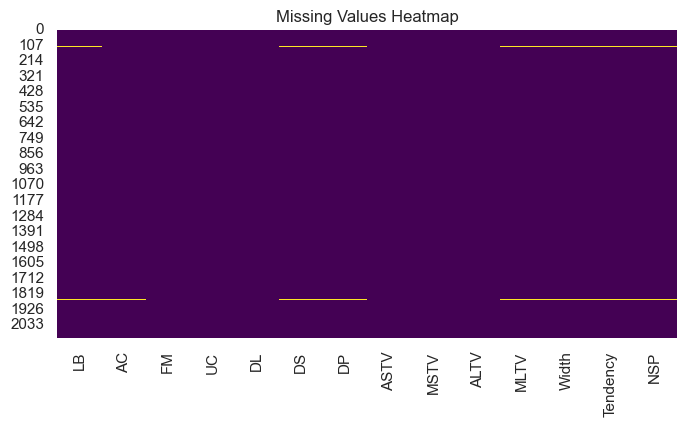

In [7]:
# Plot missing values heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

***2. Handling Missing Values***

In [8]:
# Separate numerical and categorical
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns


In [12]:
# Impute
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Impute numerical columns if they exist
if len(num_cols) > 0:
    df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Impute categorical columns if they exist
if len(cat_cols) > 0:
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])


In [14]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


***3 Scaling Numerical Feature***

***#When to use which scaling?***

StandardScaler
Makes data mean = 0 and spread = 1.
Use when data looks like a bell curve (normal distribution).
Works well with Linear/Logistic Regression, SVM, PCA.

Min-Max Scaler
Shrinks values between 0 and 1.
Use when features are on different scales and for distance-based models (KNN, K-Means, Neural Networks).
But can get badly affected if there are outliers.

***#Simple rule:If model uses distance or neural nets → Min-Max.
If model assumes normal distribution → StandardScale***

In [15]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_standard = df.copy()
df_minmax = df.copy()



In [16]:
if len(num_cols) > 0:
    df_standard[num_cols] = scaler_standard.fit_transform(df_standard[num_cols])
    df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])

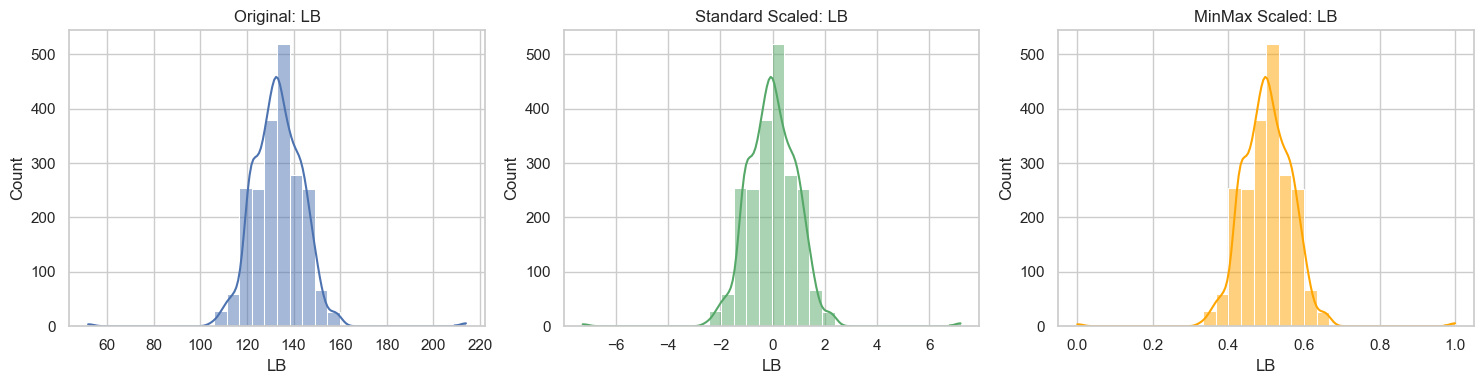

In [20]:
# Compare distributions for first numeric column
feature = num_cols[0]

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(df[feature], bins=30, kde=True)
plt.title(f"Original: {feature}")

plt.subplot(1,3,2)
sns.histplot(df_standard[feature], bins=30, kde=True, color="g")
plt.title(f"Standard Scaled: {feature}")

plt.subplot(1,3,3)
sns.histplot(df_minmax[feature], bins=30, kde=True, color="orange")
plt.title(f"MinMax Scaled: {feature}")

plt.tight_layout()
plt.show()

***4 Encoding Categorical Variables***

In [36]:
df_encoded = df.copy()

In [49]:
 

if len(cat_cols) > 0:  # Only run if categorical features exist
    # One-Hot Encoding for <= 5 categories
    low_cat_cols = [col for col in cat_cols if df[col].nunique() <= 5]
    df_encoded = pd.get_dummies(df_encoded, columns=low_cat_cols, drop_first=True)

    # Label Encoding for > 5 categories
    high_cat_cols = [col for col in cat_cols if df[col].nunique() > 5]
    le = LabelEncoder()
    for col in high_cat_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col])
# Plot distribution of the first categorical column
    plt.figure(figsize=(6,4))
    sns.countplot(x=cat_cols[0], data=df)
    plt.title(f"Distribution of {cat_cols[0]}")
    plt.show()
else:
    print("⚠️ No categorical columns found in dataset, skipping encoding and categorical plot.")

print("Original shape:", df.shape)
print("After encoding shape:", df_encoded.shape)
  

⚠️ No categorical columns found in dataset, skipping encoding and categorical plot.
Original shape: (2126, 14)
After encoding shape: (2126, 14)


***5 Feature Engineering***

In [51]:
if len(num_cols) > 0:
    # Create new features
    df['mean_value'] = df[num_cols].mean(axis=1)
    df['value_range'] = df[num_cols].max(axis=1) - df[num_cols].min(axis=1)

    print("New features created: mean_value & value_range")

New features created: mean_value & value_range


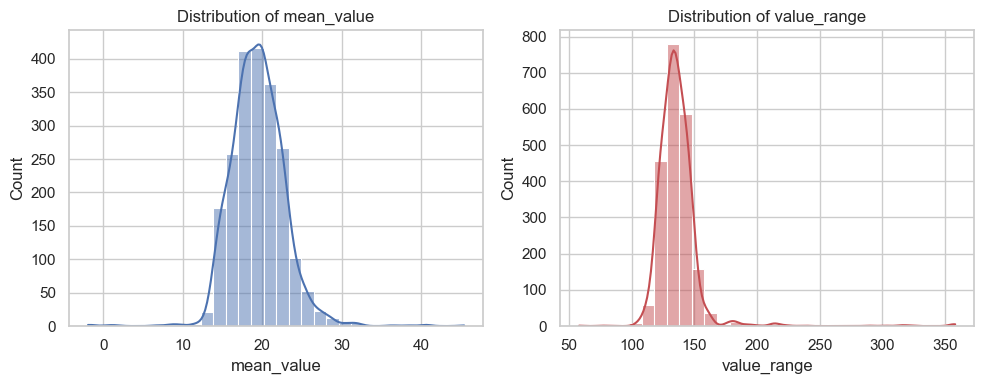

In [53]:
 # Plot new features
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['mean_value'], bins=30, kde=True, color="b")
plt.title("Distribution of mean_value")

plt.subplot(1,2,2)
sns.histplot(df['value_range'], bins=30, kde=True, color="r")
plt.title("Distribution of value_range")

plt.tight_layout()
plt.show()


***6  Transformation of Skewed Feature***

In [54]:
if len(num_cols) > 0:
    skewness = df[num_cols].skew().sort_values(ascending=False)
    print("Skewness of numeric features:\n", skewness)

    skewed_feature = skewness.index[0]

Skewness of numeric features:
 DS          8.460815
FM          6.753070
DP          6.454377
MSTV        4.142518
MLTV        3.559044
ALTV        2.981199
AC          2.026328
DL          2.010390
NSP         1.819898
UC          0.974239
Width       0.497707
LB          0.322341
ASTV        0.055872
Tendency   -0.499257
dtype: float64


In [55]:
 # Apply log transform
df[skewed_feature + "_log"] = np.log1p(df[skewed_feature])


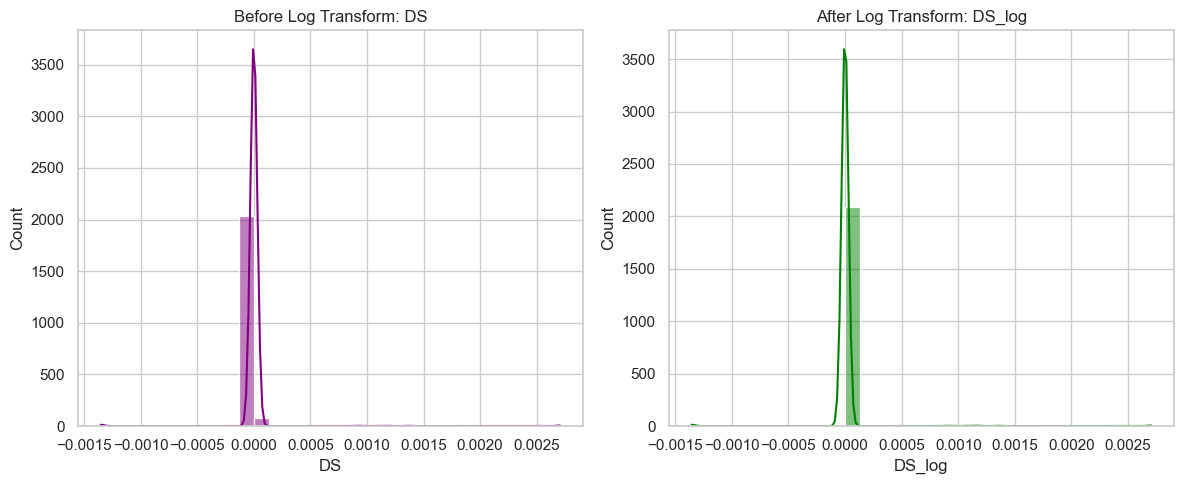

In [56]:
    # Compare before vs after
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df[skewed_feature], bins=30, kde=True, color="purple")
plt.title(f"Before Log Transform: {skewed_feature}")

plt.subplot(1,2,2)
sns.histplot(df[skewed_feature + "_log"], bins=30, kde=True, color="green")
plt.title(f"After Log Transform: {skewed_feature}_log")

plt.tight_layout()
plt.show()

***●Discuss the pros and cons of One-Hot Encoding and Label Encoding.***

***One-Hot Encoding***
Pros:
No order assumed between categories.
Works well for small number of categories.

Cons:
Increases number of columns (high dimensionality).
Not good with many unique categories.

***Label Encoding***
Pros:
Simple and fast.
Does not increase number of columns.

Cons:
Imposes an order between categories (can mislead models).
Not suitable for linear models, but okay for tree-based models.

***✅ Conclusion***

In this assignment, we learned how to prepare data for machine learning:

*Handled missing values using imputation (median for numbers, mode for categories).

*Scaled features with StandardScaler and Min-Max Scaler, and discussed when each is useful.

*Encoded categorical features using One-Hot Encoding (for few categories) and Label Encoding (for many categories).

*Engineered new features (like mean and range) to add more useful information.

*Reduced skewness using log transformation for better model performance.

***#Overall, these preprocessing and feature engineering steps are important because they make the dataset clean, balanced, and suitable for ML models, which improves accuracy and efficiency.***